In [13]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

### Importing Dataset

In [2]:
X_train=np.loadtxt('Dataset/input.csv',delimiter=',')
Y_train=np.loadtxt('Dataset/labels.csv',delimiter=',')

X_test=np.loadtxt('Dataset/input_test.csv',delimiter=',')
Y_test=np.loadtxt('Dataset/labels_test.csv',delimiter=',')

In [3]:
print("Shape of X_Train",X_train.shape)
print("Shape of Y_Train",Y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of Y_test",Y_test.shape)

Shape of X_Train (2000, 30000)
Shape of Y_Train (2000,)
Shape of X_test (400, 30000)
Shape of Y_test (400,)


### Reshaping Data

In [4]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0

### Checking shape Again

In [5]:
print("Shape of X_Train",X_train.shape)
print("Shape of Y_Train",Y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of Y_test",Y_test.shape)

Shape of X_Train (2000, 100, 100, 3)
Shape of Y_Train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of Y_test (400, 1)


In [6]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

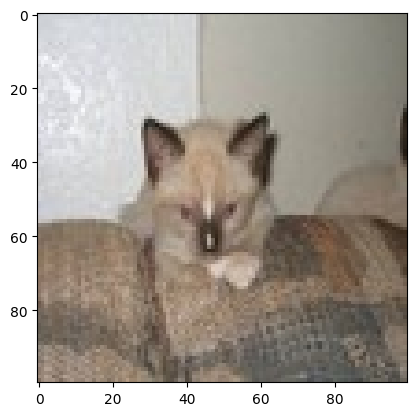

In [7]:
idx = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[idx, :])
plt.show()

### Model

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\hakgs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.5124 - loss: 0.7667
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.5640 - loss: 0.6917
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6124 - loss: 0.6556
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.6946 - loss: 0.5982
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.7709 - loss: 0.4985


In [11]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7213 - loss: 0.6087


[0.6213811635971069, 0.6899999976158142]

### Making Predictions

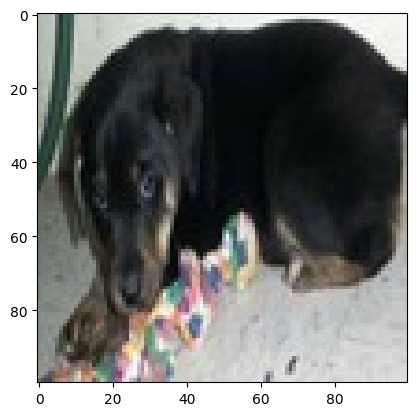

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Our Model says it's a  dog


In [12]:
idx2 = random.randint(0, len(Y_test) - 1)

plt.imshow(X_test[idx2])
plt.show()

input_data = X_test[idx2].reshape(1, 100, 100, 3)
y_pred = model.predict(input_data)

y_pred = (y_pred > 0.5).astype(int)

if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'

print("Our Model says it's a ", pred)


In [14]:
model.save("Image_classification_CNN.keras")